In [15]:
!pip install pybullet

import pybullet as p
import pybullet_data
import time

# 물리 시뮬레이션 서버에 연결
# p.GUI 쓰면 그래픽 창 바로 볼 수 있지만 Colab이니까 p.DIRECT를 사용
physicsClient = p.connect(p.DIRECT)

print("PyBullet 시뮬레이션에 연결되었습니다.")

PyBullet 시뮬레이션에 연결되었습니다.


In [16]:
# PyBullet의 데이터 파일 경로를 설정합니다.
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# 시뮬레이션에 중력을 설정. (Z축 방향으로 -9.8)
p.setGravity(0, 0, -9.8)

# PyBullet에 내장된 'plane.urdf' 파일을 불러와서 땅 생성.
planeId = p.loadURDF("plane.urdf")

print(f"바닥 생성 완료! ID: {planeId}")

바닥 생성 완료! ID: 0


In [17]:
# 로봇이 생성될 시작 위치와 방향 설정
startPos = [0, 0, 0]
startOrientation = p.getQuaternionFromEuler([0, 0, 0])

# PyBullet에 내장된 KUKA 로봇팔 URDF 파일 불러옴
# useFixedBase=True는 로봇팔이 공중에 떠다니지 않고 바닥에 고정시킴
robotId = p.loadURDF("kuka_iiwa/model.urdf", startPos, startOrientation, useFixedBase=True)

print(f"KUKA 로봇 소환 완료! ID: {robotId}")

KUKA 로봇 소환 완료! ID: 1


In [18]:
# 소환된 로봇의 관절(Joint) 개수를 확인
numJoints = p.getNumJoints(robotId)
print(f"로봇의 관절 개수: {numJoints}개")

print("\n--- 각 관절 정보 ---")
# for문을 이용해 각 관절의 상세 정보를 출력
for i in range(numJoints):
    jointInfo = p.getJointInfo(robotId, i)
    jointIndex = jointInfo[0]
    jointName = jointInfo[1].decode('utf-8')
    jointType = jointInfo[2]
    print(f"인덱스: {jointIndex}, 이름: {jointName}, 타입: {jointType}")

로봇의 관절 개수: 7개

--- 각 관절 정보 ---
인덱스: 0, 이름: lbr_iiwa_joint_1, 타입: 0
인덱스: 1, 이름: lbr_iiwa_joint_2, 타입: 0
인덱스: 2, 이름: lbr_iiwa_joint_3, 타입: 0
인덱스: 3, 이름: lbr_iiwa_joint_4, 타입: 0
인덱스: 4, 이름: lbr_iiwa_joint_5, 타입: 0
인덱스: 5, 이름: lbr_iiwa_joint_6, 타입: 0
인덱스: 6, 이름: lbr_iiwa_joint_7, 타입: 0


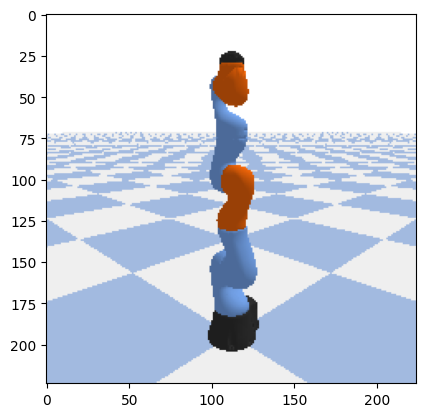

In [40]:
# 가상 카메라로 사진 찍기
# DIRECT니까 직접 확인
# 카메라 위치, 바라보는 지점, 카메라 상단 방향 벡터를 설정
viewMatrix = p.computeViewMatrix(
    cameraEyePosition=[1, 1, 1],      # 카메라 위치 (x,y,z)
    cameraTargetPosition=[0, 0, 0.7], # 카메라가 바라볼 지점
    cameraUpVector=[0, 0, 1]          # 카메라의 위쪽 방향
)

# 투영 매트릭스를 설정
projectionMatrix = p.computeProjectionMatrixFOV(
    fov=60.0,
    aspect=1.0,
    nearVal=0.1,
    farVal=100.0
)

# 설정된 카메라로 이미지를 촬영
width, height, rgbImg, depthImg, segImg = p.getCameraImage(
    width=224,
    height=224,
    viewMatrix=viewMatrix,
    projectionMatrix=projectionMatrix
)

# Matplotlib를 이용해 찍은 사진을 화면에 띄움
import matplotlib.pyplot as plt
plt.imshow(rgbImg)
plt.show()

In [41]:
p.disconnect()